# Baysian Decision Theory
Suppose a M-class $(\omega_1,\omega_2, \cdots, \omega_M)$ classification task and a attribute vector $\mathbf{x}$ symbolizing unknown sample <br>
We could simply calculate prior probability $P(\omega_k) = \frac{N_k}{N}$ and conditional probability $P(\mathbf{x}|\omega_k)$, this could processed as MLE of known data points <br>
According to Baysian Rule,

$$
    P(\omega_i|\mathbf{x}) = \frac{P(\mathbf{x}|\omega_i)P(\omega_i)}{p(\mathbf{x})}
$$

Note that $P(\mathbf{x}|\omega_i)$ is a distribution, denotes probability distribution of all possible attribute vector belonging to one specific class $\omega_i$

# Non-parametric Methods
## Parzen Window
1. window function
$$
\varphi(x)=
\left\{
\begin{array}{ll}
1 &, |\frac{(x-x_i)}{h}| \le 0.5\\
0 &, others
\end{array}
\right .
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

def generate_data(num_samples):
    
    # 生成样本
    datax = np.hstack([np.random.randn(num_samples) * 2 - 5, 
                       np.random.randn(num_samples) * 2 + 3, 
                       np.random.randn(num_samples) * 3 - 5])
    datay = np.hstack([np.random.randn(num_samples) * 6 + 5, 
                       np.random.randn(num_samples) * 4 - 6, 
                       np.random.randn(num_samples) * 4 + 3])

    x_, y_ = datax, datay
    pos_ = np.vstack([datax, datay])
    return x_, y_, pos_

def parzen_window(x, h):

    u = (pos - x.reshape(-1,1))/ h
    ix, iy = pos[:, (abs(u) <= 0.5).all(axis=0)]
    k = len(ix)

    return k / ((h**2) * n)


def rotate(angle):
    ax.view_init(azim=angle)

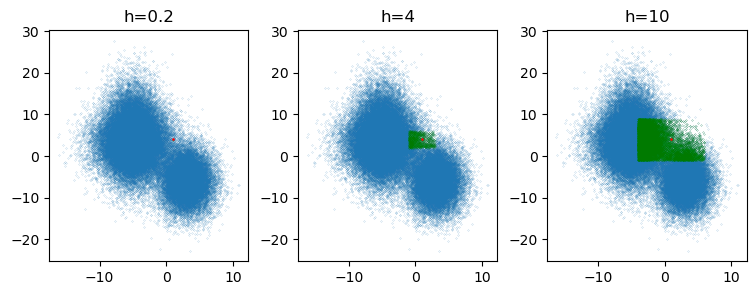

In [13]:
windowsize = [0.2, 4, 10]
n = 20000
xv, yv, pos = generate_data(n)
# 散点图
plt.figure(1,figsize=(9,3))
plt.subplots_adjust(wspace=0.25)
plot_pos = 131
xi = np.array([1,4])
for h in windowsize:
    plt.subplot(plot_pos)
    plot_pos += 1
    u = (pos - xi.reshape(-1, 1)) / h
    ix, iy = pos[:, (abs(u) <= 0.5).all(axis=0)]
    plt.title("h=" + str(h))
    plt.scatter(xv, yv, s=0.01)
    plt.scatter(ix, iy,  s=0.01, c='g')
    plt.scatter(xi[0], xi[1], c='r', s=0.75)
plt.show()

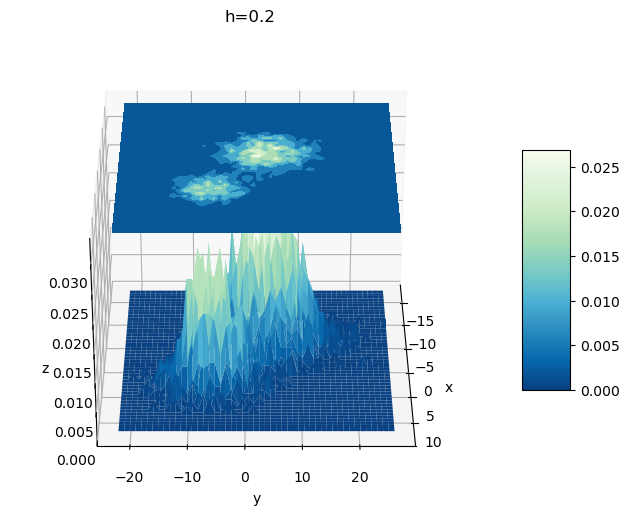

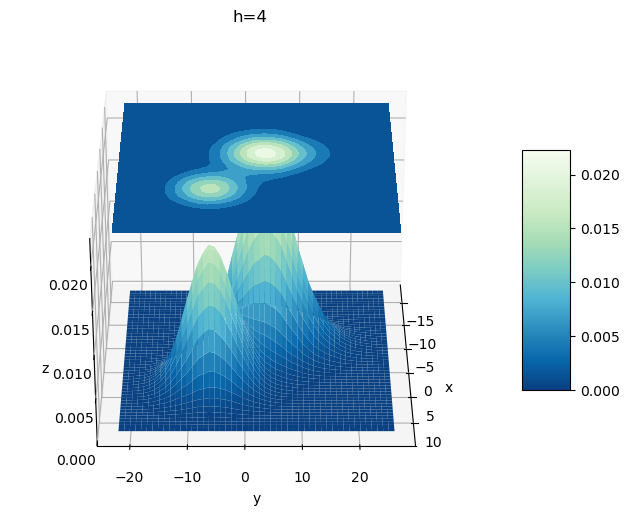

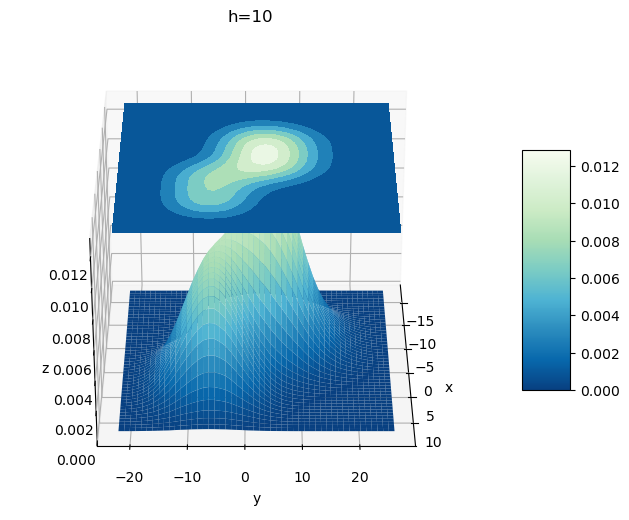

In [2]:
import warnings

warnings.filterwarnings("ignore")
# 三维
w = 50
gx = np.linspace(np.min(xv), np.max(xv), w)
gy = np.linspace(np.min(yv), np.max(yv), w)
# 获得网格坐标矩阵
gxv, gyv = np.meshgrid(gx, gy)
fgxv = gxv.ravel()
fgyv = gyv.ravel()

for i, h in enumerate(windowsize):
    fpx = np.array([parzen_window(x, h) for x in np.vstack([fgxv,fgyv]).T])
    fpx = fpx.reshape(w, w)
    fig = plt.figure(num = i+1)
    ax = Axes3D(fig)
    surf = ax.plot_surface(gxv,gyv,fpx, rstride=1, cstride=1, cmap='GnBu_r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('h='+str(h))

    # 添加等高线
    ax.contourf(gxv, gyv, fpx, zdir='z', offset= fpx.max(), cmap='GnBu_r')
    ax.set_zlim3d(0, fpx.max())
    # 添加图例bar
    fig.colorbar(surf, shrink=0.5, aspect=5)
    rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
    rot_animation.save('./rotation_{}.gif'.format('h='+str(h)), dpi=80, writer='pillow')
    plt.show()